Iris dataset before Data Standardization
   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Iris dataset after Data Standardization
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


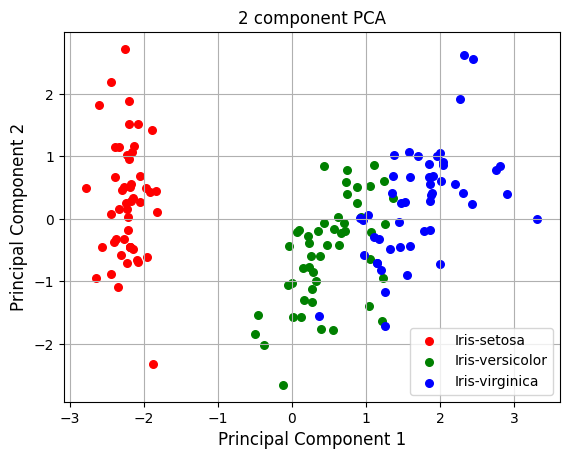

In [1]:
from pandas import read_csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Part 1: load the dataset of iris flower from csv file & display with scatter plot ------------
Colfeatures = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
csv_path = r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\2ndSemTensorFlow\week10\iris.csv'
df = read_csv(csv_path, header=None, names=Colfeatures)

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features from the label target
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['target']].values# Standardizing the features
df.columns = Colfeatures
print("Iris dataset before Data Standardization")
print(df.head())

# Part 2: Use StandardScaler to standardize the dataset’s features onto unit scale ---------------
# (mean = 0 and variance = 1) to optimal performance of machine learning algorithms
x = StandardScaler().fit_transform(x)
StandardizeX = pd.DataFrame(data = x, columns = features)
print("Iris dataset after Data Standardization")
print(StandardizeX.head())

# Part 3: Projecting the original 4-D data into 2-D principal components --------------------------
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
#print(pca.explained_variance_ratio_)

# Displaying PrincipalComponents: just the 2 main dimensions of variation
principalDf = pd.DataFrame(data = principalComponents, columns =
                           ['principal component 1', 'principal component 2'])
# Concatenating DataFrame along axis = 1 (or column).
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# Part 4: Plotting 2 dimensional data --------------------------------------------------------------
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 12)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color, s = 30)
ax.legend(targets)
ax.grid()
plt.show()